### Atividade Avaliativa - Python para Ciência de Dados
##### Autor: Dionízio Júnio Inácio
##### As base principal escolhida, bem como a sua descrição encontra-se disponível no Kaggle no link abaixo: 
<a href='https://www.kaggle.com/datasets/shahzadahmad0402/depression-and-anxiety-data'>Depression and Anxiety Data</a><br>

##### A base auxíliar relaciona o grau de obesidade ao risco de comorbidade, extraído do artigo no link abaixo:
<a href='https://rsdjournal.org/index.php/rsd/article/download/11489/10360/153481'>Link do artigo</a>

In [167]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt


###### Exibindo a base auxiliar 

In [168]:
bmi_comDF = pd.read_csv('Bmi_Comorbidity.csv')
bmi_comDF

,who_bmi,risk_of_comorbidity
0,Normal,Average
1,Overweight,Increased
2,Underweight,Severe
3,Classs I Obesity,Very Severe
4,Not Avaiable,Not Avaiable
5,Class II Obesity,Very Severe
6,Class III Obesity,Very Severe


###### Exibindo a base escolhida para o trabalho


In [169]:
myDFnoMerge = pd.read_csv("depression_anxiety_data.csv")
myDFnoMerge.head(200)

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,19,female,22.758307,Normal,12,Moderate,True,False,False,False,9,Mild,False,False,False,13.0,True
196,197,1,20,female,24.508946,Normal,16,Moderately severe,True,False,False,False,13,Moderate,True,False,False,10.0,True
197,198,1,19,female,23.495237,Normal,5,Mild,False,False,False,False,4,None-minimal,False,False,False,5.0,False
198,199,1,19,female,25.315454,Overweight,7,Mild,False,False,False,False,16,Severe,True,False,False,12.0,True


In [170]:
myDFnoMerge['who_bmi'].value_counts()

who_bmi
Normal               510
Overweight           193
Underweight           35
Class I Obesity       28
Not Availble           8
Class II Obesity       5
Class III Obesity      4
Name: count, dtype: int64

In [171]:
myDFnoMerge.columns

Index(['id', 'school_year', 'age', 'gender', 'bmi', 'who_bmi', 'phq_score',
       'depression_severity', 'depressiveness', 'suicidal',
       'depression_diagnosis', 'depression_treatment', 'gad_score',
       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness'],
      dtype='object')

###### Como o percentual de dados faltantes foi consideravelmente baixo para todos os atributos, será usado a complementação a partir do dado seguinte.

In [172]:
nan_proportion = myDFnoMerge.isna().mean()
nan_proportion

id                      0.000000
school_year             0.000000
age                     0.000000
gender                  0.000000
bmi                     0.000000
who_bmi                 0.000000
phq_score               0.000000
depression_severity     0.005109
depressiveness          0.003831
suicidal                0.001277
depression_diagnosis    0.001277
depression_treatment    0.005109
gad_score               0.000000
anxiety_severity        0.000000
anxiousness             0.007663
anxiety_diagnosis       0.005109
anxiety_treatment       0.002554
epworth_score           0.010217
sleepiness              0.010217
dtype: float64

###### Proporção de pessoas que possuem diagnóstico de depressão confirmado

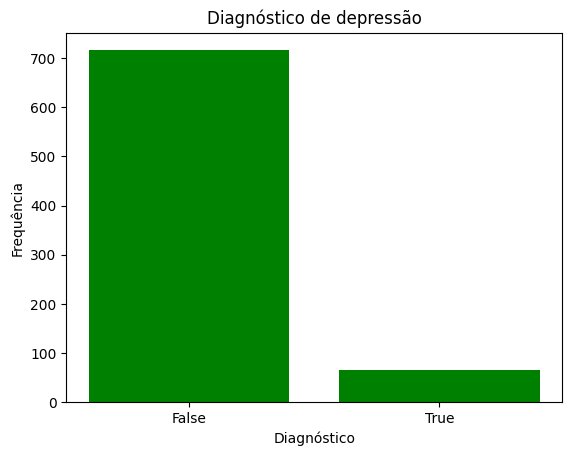

In [173]:
frequencias = myDFnoMerge['depression_diagnosis'].value_counts()

categorias = ['False', 'True']

valores = [frequencias[False], frequencias[True]]

plt.bar(categorias, valores, color= 'green')
plt.xlabel('Diagnóstico')
plt.ylabel('Frequência')
plt.title('Diagnóstico de depressão')
plt.show()

###### Complementação de dados faltantes e exibição do resultado.

In [174]:
myDFnoMerge.fillna(method ='ffill', inplace = True) 
nan_proportion = myDFnoMerge.isna().mean()
nan_proportion

id                      0.0
school_year             0.0
age                     0.0
gender                  0.0
bmi                     0.0
who_bmi                 0.0
phq_score               0.0
depression_severity     0.0
depressiveness          0.0
suicidal                0.0
depression_diagnosis    0.0
depression_treatment    0.0
gad_score               0.0
anxiety_severity        0.0
anxiousness             0.0
anxiety_diagnosis       0.0
anxiety_treatment       0.0
epworth_score           0.0
sleepiness              0.0
dtype: float64

###### Histograma e boxplot com a distribuição e os quartis das idades presentes na base de dados

###### Obs.: nota-se uma concentração maior de pessoas com idade entre 18 e 19 anos.

Text(0, 0.5, 'Frequência')

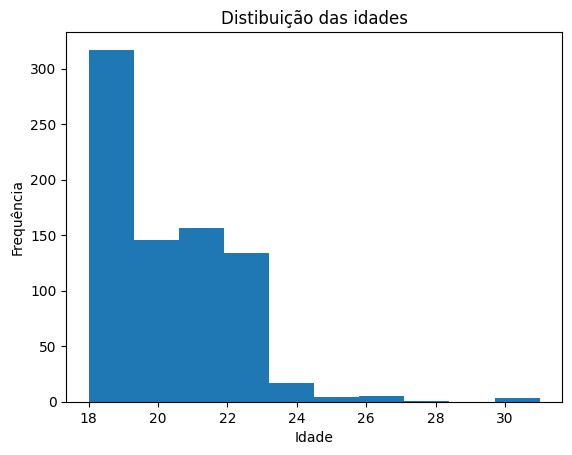

In [175]:
plt.hist(myDFnoMerge['age'])
plt.title("Distibuição das idades", loc="center", fontsize=12)
plt.xlabel("Idade")
plt.ylabel("Frequência")

Text(0.5, 0, 'Idade')

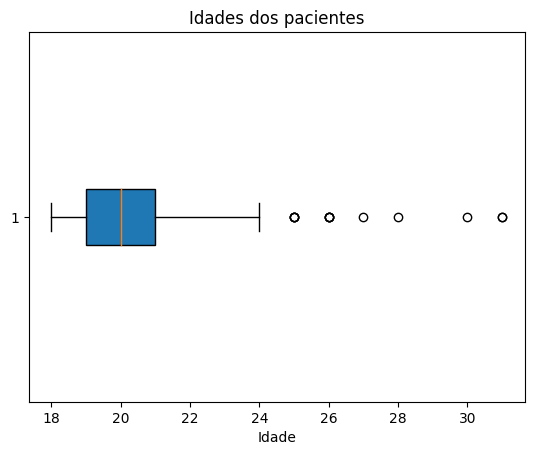

In [176]:
plt.boxplot(myDFnoMerge['age'], vert = 0, patch_artist = True)
plt.title("Idades dos pacientes", loc="center", fontsize=12)
plt.xlabel("Idade")

###### Histograma e boxplot com a distribuição dos índices de massa preesentes na base de dados
###### A distribuição dos índices de massa corporal dos pacientes tende a uma curva normal, conforme o próximo histograma.

Text(0, 0.5, 'Frequência')

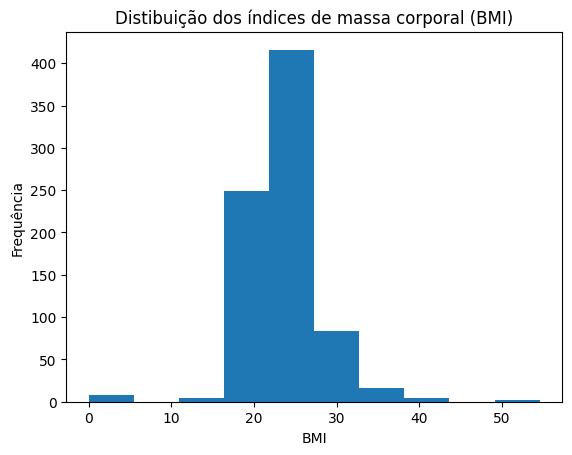

In [177]:
plt.hist(myDFnoMerge['bmi'])
plt.title("Distibuição dos índices de massa corporal (BMI)", loc="center", fontsize=12)
plt.xlabel("BMI")
plt.ylabel("Frequência")

Text(0.5, 0, 'BMI')

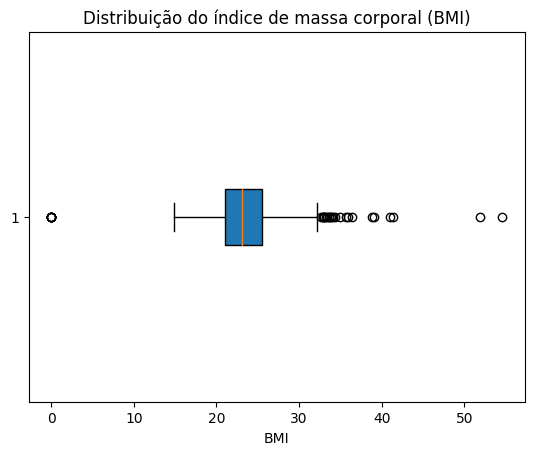

In [178]:
plt.boxplot(myDFnoMerge['bmi'], vert = 0, patch_artist = True)
plt.title("Distribuição do índice de massa corporal (BMI)", loc="center", fontsize=12)
plt.xlabel("BMI")

###### Afim de enriquecer a base principal utilizada, também será feita uma mesclagem com a base sugerida no início deste documento


In [179]:
merged_df = pd.merge(myDFnoMerge, bmi_comDF, on='who_bmi', how='left')
merged_df

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,risk_of_comorbidity
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False,NaN
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True,Average
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False,Increased
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True,Average
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False,Increased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False,Average
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False,Increased
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False,Average
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True,Average


###### Rotulação dos componentes da base de dados para treinemento

In [180]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

le = LabelEncoder()

for coluna in merged_df.columns:
    if merged_df[coluna].dtype == 'object':
        merged_df[coluna] = le.fit_transform(merged_df[coluna].astype(str))

merged_df

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,risk_of_comorbidity
0,1,1,19,1,33.333333,0,9,0,False,False,False,False,11,2,True,False,False,7.0,False,4
1,2,1,18,1,19.841270,3,8,0,False,False,False,False,5,1,False,False,False,14.0,True,0
2,3,1,19,1,25.102391,5,8,0,False,False,False,False,6,1,False,False,False,6.0,False,1
3,4,1,18,0,23.738662,3,19,2,True,True,False,False,15,4,True,False,False,11.0,True,0
4,5,1,18,1,25.617284,5,6,0,False,False,False,False,14,2,True,False,False,3.0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,0,21.096191,3,6,0,False,False,False,False,1,3,False,False,False,3.0,False,0
779,780,4,22,1,25.308642,5,4,3,False,False,False,False,6,1,False,False,False,3.0,False,1
780,781,4,22,1,22.720438,3,2,3,False,False,False,False,5,1,False,False,False,4.0,False,0
781,782,4,22,0,23.033168,3,17,2,True,False,False,False,19,4,True,False,False,15.0,True,0


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


###### Abaixo vamos definir as features, alvo de treinamento bem como o particionamento entre conjunto de teste e de treinamento
###### Para o caso, será o diagnóstico de depressão ('depresssion_diagnosis')

In [182]:
X = merged_df.drop('depression_diagnosis', axis=1)
y = merged_df['depression_diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Criação, treinamento de modelo de classificação e predição em conjunto de teste.

In [183]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##### Avaliação do desempenho do modelo
###### Nota-se que conforme os valores presentes no f1 score, o modelo é relativamente eficiente nos casos onde 
###### não há diagnóstico de depressão. Porém, apresenta um desempenho ruim para os casos onde há depressão confirmada.
###### Neste caso, o reajuste dos hiperparâmetros ou a adoção de outra técnica de treinamento poderiam fornecer melhores resultados. 

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       145
        True       0.67      0.50      0.57        12

    accuracy                           0.94       157
   macro avg       0.81      0.74      0.77       157
weighted avg       0.94      0.94      0.94       157



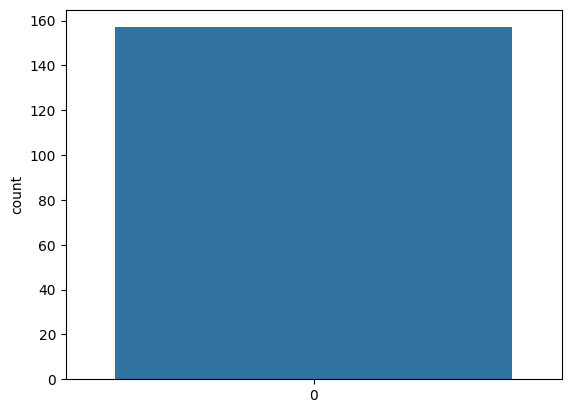

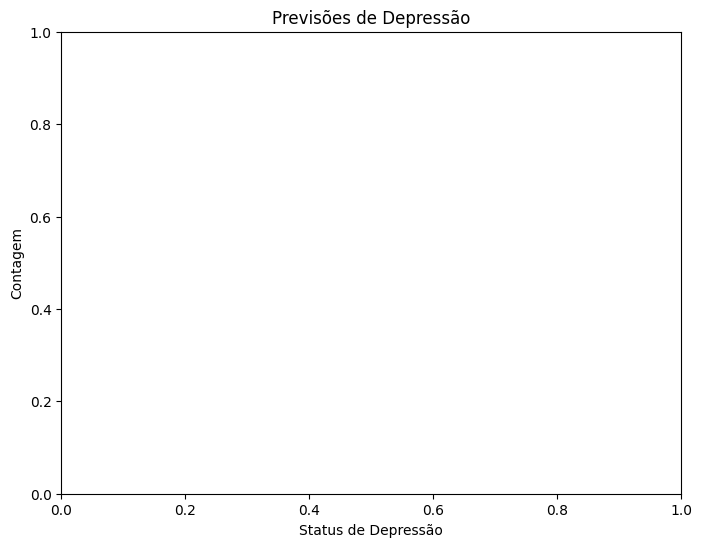

In [184]:
print(classification_report(y_test, y_pred))

import seaborn as sns
sns.countplot(y_pred)
plt.figure(figsize=(8, 6))
plt.title("Previsões de Depressão")
plt.xlabel("Status de Depressão")
plt.ylabel("Contagem")
plt.show()